## Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Reading the dataset

In [69]:
df=pd.read_csv("Final+Test+Data+Set.csv")

In [70]:
df.shape

(614, 13)

In [71]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Looking at the datatypes present

In [72]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking for null values in the dataset

In [73]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


## Visualizing Data

<AxesSubplot:>

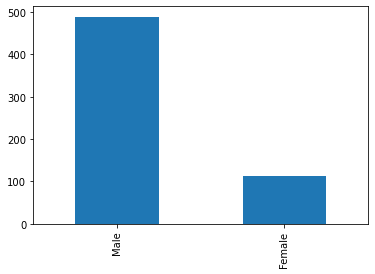

In [75]:
df.Gender.value_counts().plot.bar()

<AxesSubplot:xlabel='Self_Employed'>

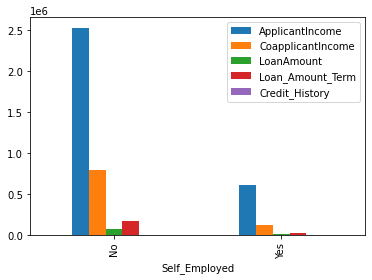

In [76]:
df.groupby("Self_Employed").sum().plot.bar()

In [77]:
df.groupby("Self_Employed").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,,,,,
No,2524874,790494.919989,68323.0,167856.0,387.0
Yes,605227,123110.000000,13588.0,26904.0,63.0


<AxesSubplot:xlabel='Gender,Self_Employed'>

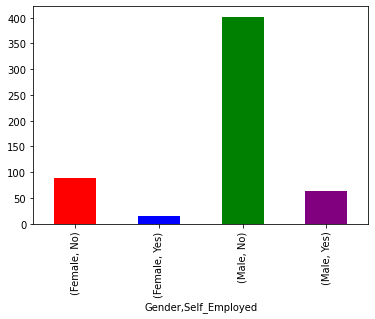

In [78]:
df.groupby(['Gender','Self_Employed']).size().plot.bar(stacked=True, color=['Red','Blue','Green','Purple'])

<AxesSubplot:xlabel='Gender,Education'>

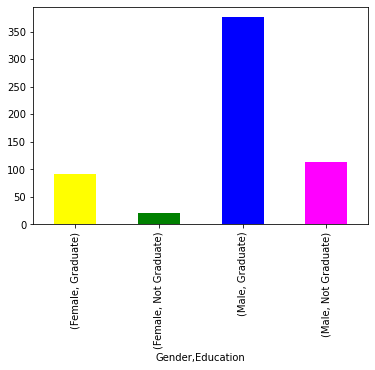

In [79]:
df.groupby(['Gender','Education']).size().plot.bar(stacked=True, color=['Yellow','Green','Blue','Magenta'])

<AxesSubplot:xlabel='Education,Property_Area'>

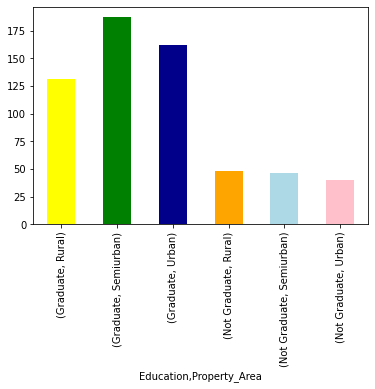

In [80]:
df.groupby(['Education','Property_Area']).size().plot.bar(stacked=True, color=['Yellow','Green','DarkBlue','Orange','LightBlue','Pink'])

<AxesSubplot:xlabel='Education,Loan_Status'>

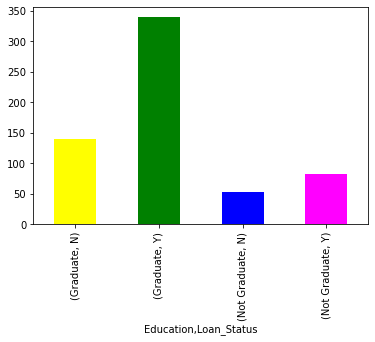

In [81]:
df.groupby(['Education','Loan_Status']).size().plot.bar(stacked=True, color=['Yellow','Green','Blue','Magenta'])

<AxesSubplot:xlabel='Married,Education'>

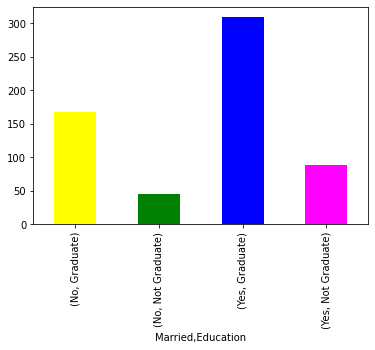

In [82]:
df.groupby(['Married','Education']).size().plot.bar(stacked=True, color=['Yellow','Green','Blue','Magenta'])

<AxesSubplot:xlabel='Dependents,Education'>

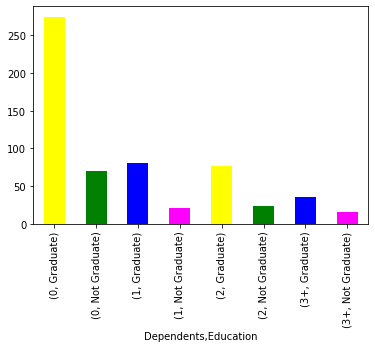

In [83]:
df.groupby(['Dependents','Education']).size().plot.bar(stacked=True, color=['Yellow','Green','Blue','Magenta'])

<AxesSubplot:xlabel='Self_Employed,Loan_Status'>

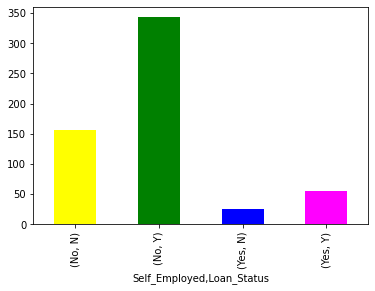

In [84]:
df.groupby(['Self_Employed','Loan_Status']).size().plot.bar(stacked=True, color=['Yellow','Green','Blue','Magenta'])

## Checking for outliers

<AxesSubplot:>

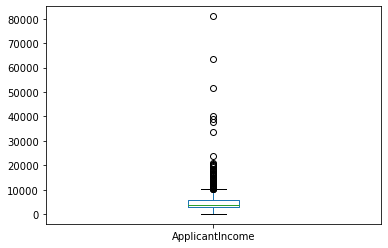

In [85]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

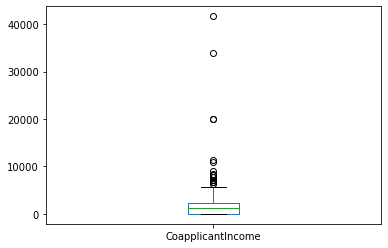

In [86]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

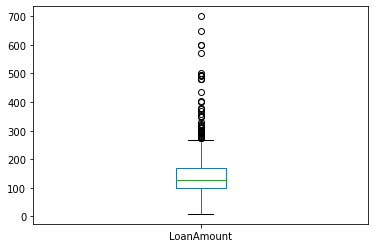

In [87]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

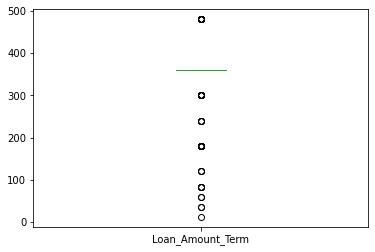

In [88]:
df['Loan_Amount_Term'].plot.box()

## Data preprocessing 
## -Converting object datatype into int for building model
## -Removing Loan_Id column which has no significant role

In [89]:
df.drop('Loan_ID', axis=1, inplace=True)

In [90]:
df['Loan_Status']=df['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)

In [91]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [92]:
df['Dependents'].replace('3+','3',inplace=True)

In [93]:
df['Gender']=df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [94]:
df['Married']=df['Married'].apply(lambda x: 0 if x=='No' else 1)

In [95]:
df['Education']=df['Education'].apply(lambda x: 0 if x=='NotGraduate' else 1)

In [96]:
df['Self_Employed']=df['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)

In [97]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1,Urban,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,Urban,1
3,0,1,0,1,0,2583,2358.0,120.0,360.0,1,Urban,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,Rural,1
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,Rural,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,Urban,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,Urban,1


## Filling the null entries with appropriate values using mean,mode approach

In [98]:
df.fillna(df['Self_Employed'].mode(), inplace=True)

In [99]:
df.fillna(df['Dependents'].mode(), inplace=True)

In [100]:
df.fillna(df['Married'].mode(), inplace=True)

In [101]:
df.fillna(df['Gender'].mode(), inplace=True)

In [102]:
df.fillna(df['LoanAmount'].mean(), inplace=True)

In [103]:
df.fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [104]:
df.fillna(df['Credit_History'].mode(), inplace=True)

## Handling the outliers using square root method

In [105]:
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])


In [106]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])


In [107]:
df['LoanAmount'] = np.sqrt(df['LoanAmount'])


In [108]:
df['Loan_Amount_Term'] = np.sqrt(df['Loan_Amount_Term'])


In [109]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,76.478755,0.000000,12.100089,18.973666,1.0,Urban,1
1,0,1,1,1,0,67.697858,38.832976,11.313708,18.973666,1.0,Rural,0
2,0,1,0,1,1,54.772256,0.000000,8.124038,18.973666,1.0,Urban,1
3,0,1,0,1,0,50.823223,48.559242,10.954451,18.973666,1.0,Urban,1
4,0,0,0,1,0,77.459667,0.000000,11.874342,18.973666,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,53.851648,0.000000,8.426150,18.973666,1.0,Rural,1
610,0,1,3,1,0,64.078077,0.000000,6.324555,13.416408,1.0,Rural,1
611,0,1,1,1,0,89.844310,15.491933,15.905974,18.973666,1.0,Urban,1
612,0,1,2,1,0,87.080423,0.000000,13.674794,18.973666,1.0,Urban,1


In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
newdf=df
newdf.Property_Area=le.fit_transform(newdf.Property_Area)
newdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,76.478755,0.000000,12.100089,18.973666,1.0,2,1
1,0,1,1,1,0,67.697858,38.832976,11.313708,18.973666,1.0,0,0
2,0,1,0,1,1,54.772256,0.000000,8.124038,18.973666,1.0,2,1
3,0,1,0,1,0,50.823223,48.559242,10.954451,18.973666,1.0,2,1
4,0,0,0,1,0,77.459667,0.000000,11.874342,18.973666,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,53.851648,0.000000,8.426150,18.973666,1.0,0,1
610,0,1,3,1,0,64.078077,0.000000,6.324555,13.416408,1.0,0,1
611,0,1,1,1,0,89.844310,15.491933,15.905974,18.973666,1.0,2,1
612,0,1,2,1,0,87.080423,0.000000,13.674794,18.973666,1.0,2,1


In [111]:
newdf.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [112]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [113]:
df['Gender'] = df['Gender'].astype('O')

In [114]:
df['Married'] = df['Married'].astype('O')

In [115]:
df['Education'] = df['Education'].astype('O')

In [116]:
df['Property_Area'] = df['Property_Area'].astype('O')

In [117]:
df['Loan_Status'] = df['Loan_Status'].astype('O')

In [118]:
df['Self_Employed'] = df['Self_Employed'].astype('O')

## Separating numeric and categorical values for preprocessing

In [119]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [120]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [121]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,1,2,1
1,0,1,1,1,0,1,0,0
2,0,1,0,1,1,1,2,1
3,0,1,0,1,0,1,2,1
4,0,0,0,1,0,1,2,1


In [122]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,76.478755,0.000000,12.100089,18.973666
1,67.697858,38.832976,11.313708,18.973666
2,54.772256,0.000000,8.124038,18.973666
3,50.823223,48.559242,10.954451,18.973666
4,77.459667,0.000000,11.874342,18.973666


In [123]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

## Standardizing the numeric values 

In [133]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled = ss.fit_transform(num_data)
scaled_columns=pd.DataFrame(scaled,columns=col)
scaled_columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.299200,-0.968111,0.125648,0.322846
1,-0.029996,0.374245,-0.137054,0.322846
2,-0.514577,-0.968111,-1.202609,0.322846
3,-0.662626,0.710457,-0.257069,0.322846
4,0.335975,-0.968111,0.050234,0.322846
...,...,...,...,...
609,-0.549090,-0.968111,-1.101684,0.322846
610,-0.165701,-0.968111,-1.803752,-2.075366
611,0.800275,-0.432594,1.397058,0.322846
612,0.696657,-0.968111,0.651700,0.322846


In [125]:
newdf=pd.concat([scaled_columns,cat_data,], axis=1)
newdf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0.299200,-0.968111,0.125648,0.322846,0,0,0,1,0,1,2,1
1,-0.029996,0.374245,-0.137054,0.322846,0,1,1,1,0,1,0,0
2,-0.514577,-0.968111,-1.202609,0.322846,0,1,0,1,1,1,2,1
3,-0.662626,0.710457,-0.257069,0.322846,0,1,0,1,0,1,2,1
4,0.335975,-0.968111,0.050234,0.322846,0,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.549090,-0.968111,-1.101684,0.322846,1,0,0,1,0,1,0,1
610,-0.165701,-0.968111,-1.803752,-2.075366,0,1,3,1,0,1,0,1
611,0.800275,-0.432594,1.397058,0.322846,0,1,1,1,0,1,2,1
612,0.696657,-0.968111,0.651700,0.322846,0,1,2,1,0,1,2,1


In [126]:
newdf.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [127]:
x=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1:]
y=y.astype('int')


## Spliting the dataset for building model

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)


## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)*100

71.42857142857143

## Support vector Machine

In [130]:
from sklearn import svm
sm= svm.SVC()
sm.fit(x_train, y_train)
pred2 = sm.predict(x_test)
accuracy_score(y_test,pred2)*100

72.07792207792207

## RandomForest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print ("The accuracy of RFC is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of RFC is :  81.81818181818183 %


## Gaussian Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred1=model.predict(x_test)
print ("The accuracy of GNB is : ", accuracy_score(y_test, pred1)*100, "%")

The accuracy of GNB is :  71.42857142857143 %
